<img style="float: left;" src="images/unige_csd.png" alt="drawing" width="200"/>

# <center>Imagerie Numérique 2023 Automne</center>

<center>October 26, 2023</center>

# <center><ins>TP Class N°3 - Image acquisition and sensing</ins></center>

#### *Instructions :*  

* This TP should be completed and uploaded on Moodle before **Thursday 9 November 2023, 23h59**.
* The name of the file you upload should be **TP3_name_surname.ipynb**.
* If you need to include attached files to you TP, please archive them together in a folder named **TP3_name_surname.zip**.

# Exercise 1

Have a look at the following image :

![photography main parameters](images/photography_main_parameters.jpg)

Using these illustrations, explain the concepts of Aperture, Shutter speed and ISO. How are they built in a modern Digital Single-Lens Reflex ?

# Exercise 2

(a) In a 100 × 100 RGB image each pixel is represented by 256 levels of intensity. How many bytes are needed to store these image without any compression?

For coding 1 pixel, we need 8 bits because $log_2(256) = 8$, and we have 256 levels of intensity. As a byte is equal to 8 bits, to store an RGB image $100\times100$ without any compression, we need:
$$\frac{100 \times 100 \times 3 \times 8}{8} = 30000\ bytes$$

(b) In a 100 × 100 gray-scale image each pixel is represented by 4 levels of intensity. How many bytes are needed to store these image without any compression?

Each pixel is represented by 4 levels of intensity. So we need 2 bits to encode this information: $log_2(4) = 2$. So to store the gray-scale image $100 \times 100$ without any compression, we need:
$$\frac{100 \times 100 \times 2}{8} = 2500\ bytes$$ 

(c) Generate a $100 \times 100$ RGB image constituted of uniform random noise (use *numpy.random.uniform()*). Save it as a png file using *plt.imsave()*. Comment on the size of the file.

**Hint :** In order to understand what is going on, you might want to load the image again in Python using *plt.imread()*

Informations of the image created
----------------------------------
Image data type: float32
Image shape: (100, 100, 3)
Dynamic range: 0.9998719692230225


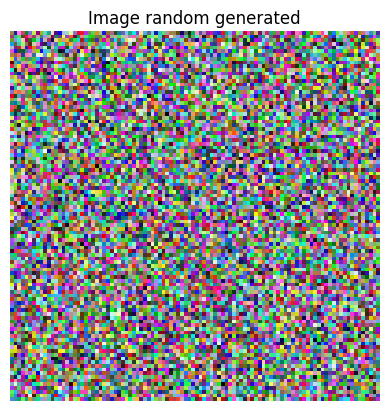

Informations of the image saved and reloaded
--------------------------------------------
Image data type: float32
Image shape: (100, 100, 4)
Dynamic range: 1.0


In [5]:
import matplotlib.pyplot as plt
import numpy as np

def generate_image() -> np.ndarray:
    image = np.random.uniform(size=(100, 100, 3))
    image = np.float32(image)
    return image

def image2float(image: np.ndarray) -> np.ndarray:
    if image.dtype == np.uint8:
        image = np.float32(image/255)
    elif image.dtype == np.float64:
        image = np.float32(image)
    return image

def print_informations_image(image: np.ndarray):
    print("Image data type: " + str(image.dtype))
    print("Image shape: " + str(image.shape))
    print(f"Dynamic range: {np.max(image) - np.min(image)}")

def print_image(image: np.ndarray, title: str, cmap='viridis'):
    plt.figure()
    plt.imshow(image, cmap=cmap)
    plt.axis('off')
    plt.title(title)
    plt.show()

def MSE(image1: np.ndarray, image2: np.ndarray):
    return np.linalg.norm(image1 - image2)
    
def save_image(image: np.ndarray, name: str):
    plt.imsave('./images_saved/' + name, image)

def load_image(name: str, path='./images_saved/'):
    return plt.imread(path + name)

random_image = generate_image()
print("Informations of the image created")
print("----------------------------------")
print_informations_image(random_image)
print_image(random_image, "Image random generated")
save_image(random_image, 'saved.png')
random_image_saved = load_image('saved.png')
print("Informations of the image saved and reloaded")
print("--------------------------------------------")
print_informations_image(random_image_saved)


When we store our image, the png format add a new channel, so the image has a shape of...blablalba

(d) Generate a $100 \times 100$ grayscale gradient image (see TP1 ex 2). Save it again as a png file. Comment.

Informations of the image created
----------------------------------
Image data type: float32
Image shape: (100, 100)
Dynamic range: 1.0


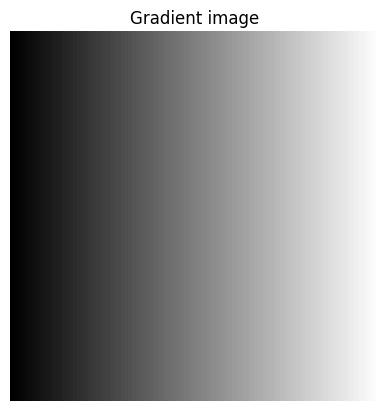

Informations of the image saved and reloaded
--------------------------------------------
Image data type: float32
Image shape: (100, 100, 4)
Dynamic range: 0.9960784316062927


In [6]:
def generate_gradient_image(heigh: int, weight: int) -> np.ndarray:
    gradient = np.linspace(0, 255, weight, dtype=np.uint8)
    gradient = np.tile(gradient, (heigh, 1))
    return gradient

gradient = generate_gradient_image(100, 100)
gradient = image2float(gradient)
print("Informations of the image created")
print("----------------------------------")
print_informations_image(gradient)
print_image(gradient, "Gradient image", 'gray')
save_image(gradient, 'gradient.png')
gradient_saved = load_image('gradient.png')
print("Informations of the image saved and reloaded")
print("--------------------------------------------")
print_informations_image(gradient_saved)


PNG format has saved the image with one channel into 4 channels, so we don't have the right size...

# Exercise 3

(a) Explain the difference between sampling and quantization.
sampling: pixels de l'image: rendre la grille des pixels
quantization: distrétiser les valeurs dans la grille

For a continuous function given, sampling cuts our functions in regurar intervales (so it discretize our function...), whereas quantization make an approximation of our function for each values given... And we store just the values aproximated and discretized. It's usefull for instante to encode an image with just 64 levels of intensity (so with $log_2(64) = 6$ bits): we make a quantization to have our pixel's image just with the right level of intensity, and then we can store our image with less bytes because we don't need 8 bits to encode image with 64 levels of intensity, but just 6.

For instance, I show you an example below with function sinus on range [0, 5]. We discretize our function thanks to sampling, and then we approximate values thanks to quantization.

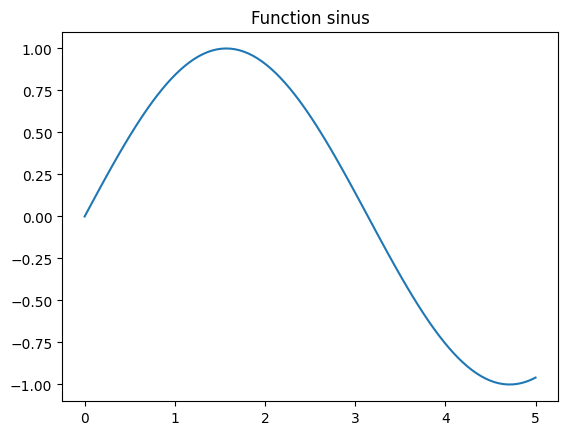

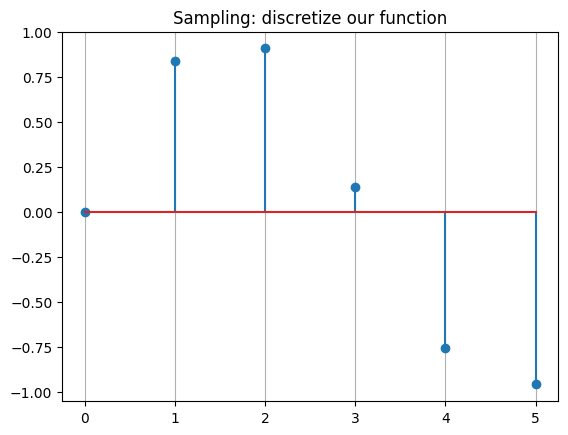

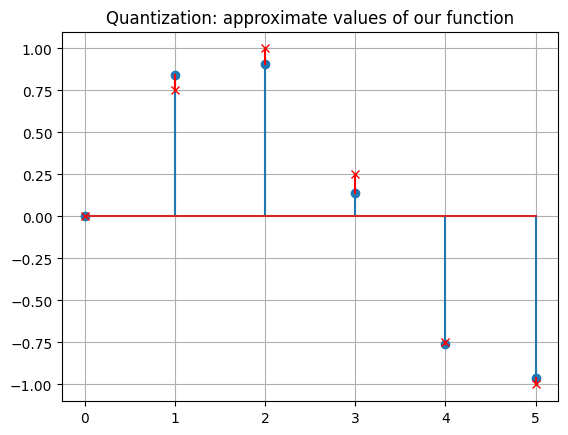

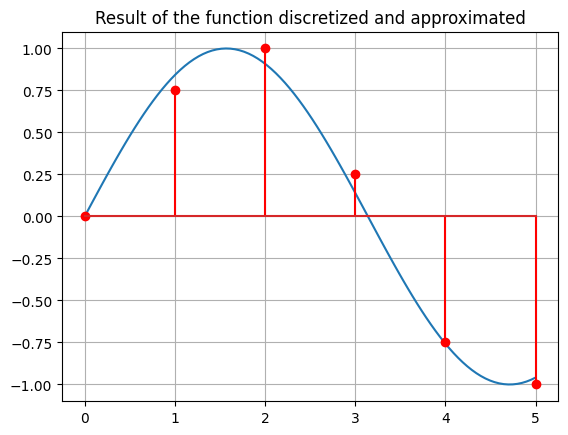

In [15]:
def example():
    x = np.linspace(0, 5, 100)
    y = np.sin(x)
    x_grid = [i for i in range(6)]
    y_grid = np.sin(x_grid)
    plt.figure()
    # plt.subplot(1, 3, 1)
    plt.plot(x, y)
    plt.title('Function sinus')
    plt.show()
    # plt.subplot(1, 3, 2)
    # plt.plot(x, y)
    #plt.plot(x_grid, y_grid, 'ro')
    plt.stem(x_grid, y_grid)
    plt.title('Sampling: discretize our function')
    plt.grid(axis = 'x')
    plt.show()
    # plt.subplot(1, 3, 3)
    #plt.plot(x, y)
    plt.stem(x_grid, y_grid, '.')
    plt.plot([1, 1], [y_grid[1], 0.75], 'r-')
    plt.plot([2, 2], [y_grid[2], 1], 'r-')
    plt.plot([3, 3], [y_grid[3], 0.25], 'r-')
    plt.plot([4, 4], [y_grid[4], - 0.75], 'r-')
    plt.plot([5, 5], [y_grid[5], -1], 'r-')
    y_quantized = [0, 0.75, 1, 0.25, -0.75, -1]
    plt.plot(x_grid, y_quantized, 'rx')
    plt.title("Quantization: approximate values of our function")
    plt.grid()
    plt.show()
    plt.figure()
    plt.plot(x, y)
    plt.stem(x_grid, y_quantized, 'r')
    plt.grid()
    plt.title("Result of the function discretized and approximated")
    plt.show()

example()

(b) You are given a continuous signal  *$f(x) = sin(x)+\frac{1}{10} cos(10x)$* over the interval *$0 \leq  x \leq 8 \pi$* and *$-1.1 \leq y \leq 1.1$*.

Using *np.linspace()* and *plt.plot()*, visualize this continuous signal on the given interval with a high number of samples.

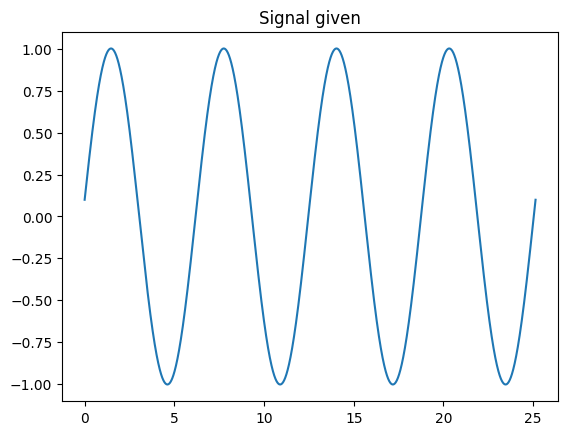

In [150]:
def visualize_signal():
    x = np.linspace(0, 8*np.pi, 10000)
    y = np.sin(x) + np.cos(x)/10
    plt.figure()
    plt.plot(x, y)
    plt.title("Signal given")
    plt.show()

visualize_signal()

(c) Choose various values of sampling and quantization for this signal and plot the results on a grid of subplots, varying both parameters. Comment on the quality of the approximation.

**Hint :** Use *np.linspace()* and *np.digitize()* to generate the correct sampling and quantizations, try different values of samples and bins.

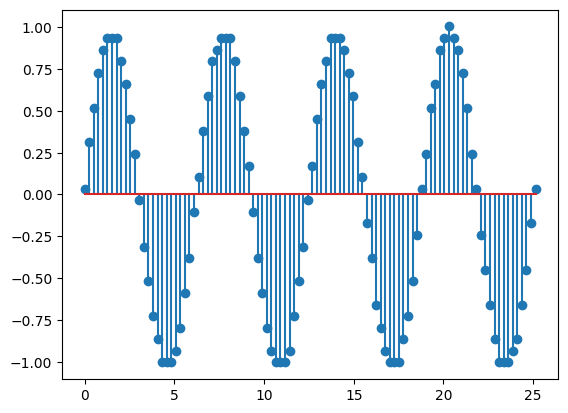

In [151]:
f = lambda x: np.sin(x) + np.cos(x)/10

def sampling_quantize(f, x_min, x_max, sampling, quantization):
    x = np.linspace(x_min, x_max, sampling)
    y = f(x)
    y_quantization = np.linspace(np.min(y), np.max(y), quantization)
    index_quantization = np.digitize(y, y_quantization) - 1
    y_quantization[index_quantization]
    plt.figure()
    plt.stem(x, y_quantization[index_quantization])
    plt.show()

sampling_quantize(f, 0, 8*np.pi, 100, 30)
    

> Answer here

The quality of the quantization depends on the number of sampling, but also on the number of levels given by quantization.

If we see the result for a little number of sampling, but a big number of levels, the result looks bad, like the result with a big number of sampling and a little number of levels...

# Exercise 4

(a) Generate a gradient image like the one represented in Figure 1. Encode the image with $k=7, 5, 3, 2, 1$ bits (Theme 3, page 109). Display and explain the results.

<figure>
<center>
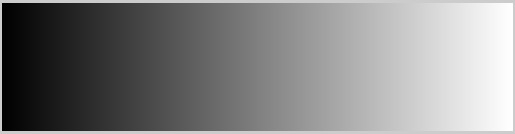
<figcaption>Figure 1: Gradient image</figcaption></center>
</figure>

In [152]:
a = np.array([0,0.4,.7,1]).reshape([2,2])

q = np.array([0, .5,  1])
q_2 = np.array([0, 1])

r_1 = np.digitize(a, q)
print(np.digitize(a, q, True))
r_3 = np.digitize(a, q_2, True)
r_2 = np.digitize(a, q_2) - 1

#print(r_3)
print(r_1)
r_1[r_1 >= len(q)] = len(q) - 1
print(r_1)

#print(r_1)
#print(r_2)
#print(np.digitize(a, q) - 1)

[[0 1]
 [2 2]]
[[1 1]
 [2 3]]
[[1 1]
 [2 2]]


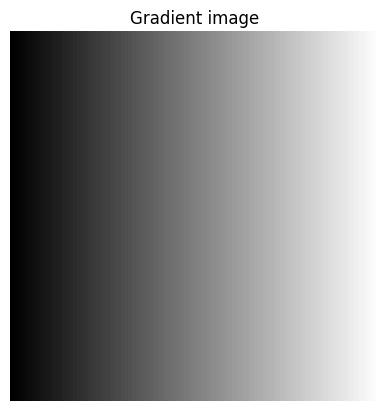

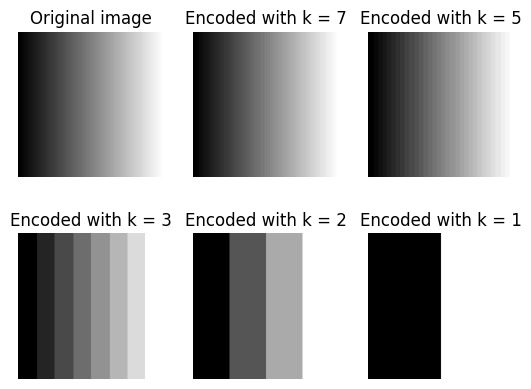

In [18]:
gradient_image = generate_gradient_image(100, 100)
print_image(gradient_image, 'Gradient image', 'gray')

def quantize_image(image: np.ndarray, quantization: int) -> np.ndarray:
    if image.dtype == np.uint8:
        image = np.float32(image/255)
    quantize = np.linspace(0, 1, quantization + 1)
    result = np.digitize(image, quantize)
    result[result >= len(quantize)] = len(quantize) - 1.
    return quantize[result]


def encode_image(image: np.ndarray, k: int) -> np.ndarray:
    return quantize_image(image, 2**k)

def print_encoded_image(image: np.ndarray, cmap='viridis'):
    list_encode = [7, 5, 3, 2, 1]
    plt.figure()
    plt.subplot(2, 3, 1)
    plt.imshow(image, 'gray')
    plt.axis('off')
    plt.title("Original image")
    for i in range(len(list_encode)):
        plt.subplot(2, 3, i + 2)
        plt.imshow(encode_image(image, list_encode[i]), 'gray')
        plt.axis('off')
        plt.title(f"Encoded with k = {list_encode[i]}")
    plt.show()

print_encoded_image(gradient_image, 'gray')

> Answer here

We can see that the difference between the original image and the image encoded with k = 7 is not big... We can see a small difference between the two, but the quality stay good.

In fact, when we encode an image with k bits, we represent only $2^k$ levels of intensity, that's why the image encoded with k = 1 has $2^1 = 2$ levels of intensity: black and white.

So we can see that there is no major difference between original image and image encoded with k = 7 and k = 5, but when the image is encoded with k = 3, we have a big difference (we just have $2^3 = 8$ levels of intensity represented in our image, so we see a big difference between $2^8 = 256$ and $2^3 = 8$ levels of intensity), like when the image is encoded whith k = 2 and k = 1.

(b) Do the same for the grayscale image *lena.png*.  Display the obtained results.

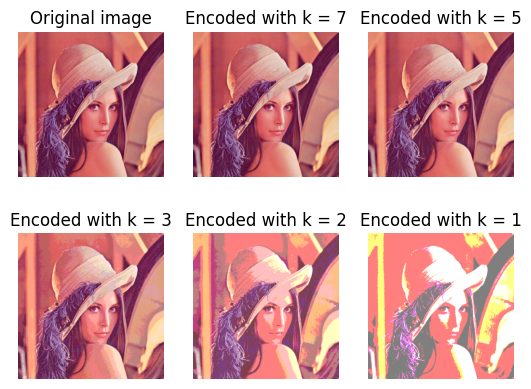

In [154]:
lena = plt.imread('./images/lena.png')
print_encoded_image(lena)

> Answer 

When we encode an image with k bits, we allow the image to have just a number of different intensity of $2^k$

# Exercise 5

(a) Write the function that measures PSNR value between two images (see Theme 2, Lecture notes).

In [22]:
def PSNR(image_1: np.ndarray, image_2: np.ndarray) -> float:
    if len(image_1.shape) > 2 and image_1.shape[2] == 3:
        result = 0
        for i in range(3):
            result += 10*np.log10(((np.max(image_1[:, :, i])*255)**2)/MSE(image_1[:, :, i], image_2[:, :, i]))
        return result /3
    return 10*np.log10(((np.max(image_1)*255)**2)/MSE(image_1, image_2))

(b) Read the image *lena.png* and convert it to grayscale with dynamic range in $[0,1]$. Create 10 noisy lena images by adding a zero-mean white Gaussian noise with standard deviation $\sigma = 0.1$.

Image data type: float32
Image shape: (496, 496)
Dynamic range: 0.8944583535194397


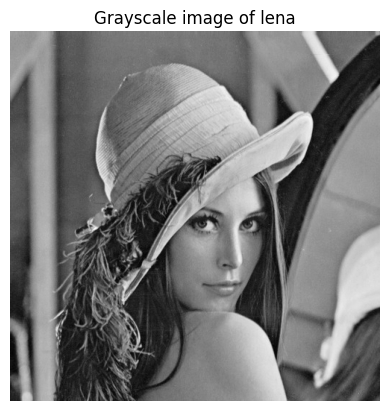

In [23]:
import skimage as sk

lena = plt.imread('./images/lena.png')

lena = image2float(lena)
graylena = sk.color.rgb2gray(lena)
print_informations_image(graylena)

print_image(graylena, "Grayscale image of lena", 'gray')

def create_noise(shape: tuple[int, int], sigma: int) -> np.ndarray:
    return np.float32(sigma * np.random.randn(shape[0], shape[1]))

sigma = 0.1
gaussian_noises = []
for i in range(10):
    #gaussian_noises.append(sk.util.random_noise(graylena, mode='gaussian', clip=True, var=sigma))
    gaussian_noises.append(np.float32(sigma * np.random.randn(lena.shape[0], lena.shape[1])))

(c) Report the average PSNR value between the original and noisy images.
> **Hint** Measure the PSNR between the original and each noisy image, then compute the mean of the results.

In [24]:
average_PSNR = 0
noisy_lena = []
for i in range(len(gaussian_noises)):
    noisy_image = graylena + gaussian_noises[i]
    noisy_lena.append(noisy_image)
    average_PSNR += PSNR(graylena, noisy_image)
average_PSNR /= len(gaussian_noises)
print(f"Average PSNR value between the original and noisy images: {average_PSNR}")

Average PSNR value between the original and noisy images: 30.74445883967268


In [25]:
a = [[0, 1], [1, 2], [2, 3]]
print(np.mean(a, axis=0))

[1. 2.]


(d) Perform image denoising by using the so named _frame averaging_ approach.
> **Hint** Perform a pixel-wise summation of all noisy images. Divide the obtained sum image by the number of images in the summation.

Ex: on prend plusieurs photos d'un même objet, on fait la somme de ces 3 photos et du bruit de ces 3 photos, et on divise par 3

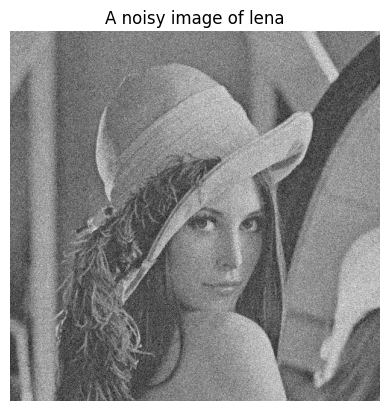

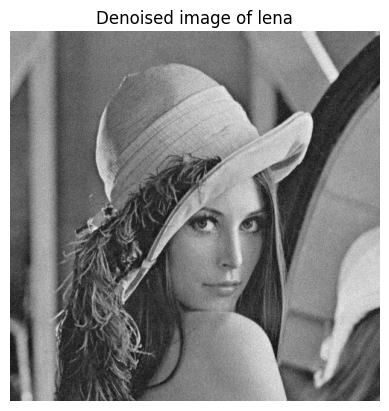

In [26]:
denoised_image = np.mean(noisy_lena, axis=0)
print_image(noisy_lena[0], "A noisy image of lena", 'gray')
print_image(denoised_image, "Denoised image of lena", 'gray')

(e) Measure the PSNR between the original and the denoised image. Comment the obtained result in the light of the previous computations. Explain when (under which condition) _frame averaging_ is successful and when it does not work.

In [27]:
print(f"PSNR between the original and the denoised image: {PSNR(graylena, denoised_image)}")

PSNR between the original and the denoised image: 35.74159945426079


> -- your answer --

# Exercise 6

You are given a pair of two images (reference and noisy) from the [RENOIR dataset](http://ani.stat.fsu.edu/~abarbu/Renoir.html).

<p align="center">
<img src="images/reference.bmp" alt="reference" width="300"/>
<img src="images/noisy.bmp" alt="noisy" width="300"/>
</p>

(a) Visualize each color channels for both images (a grayscale display of each channel). Are all channels equally affected by the noise? Justify your answer based on the _PSNR_ or _MSE_.

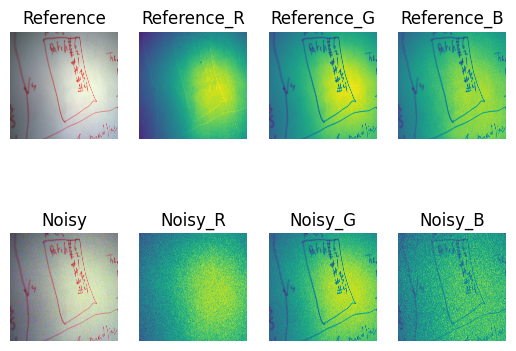

In [161]:
reference = plt.imread("./images/reference.bmp")
noisy = plt.imread("./images/noisy.bmp")

images_to_print = [reference, noisy]
RGB = ["_R", "_G", "_B"]
images_to_print_titles = ["Reference", "Noisy"]

plt.figure()
for i in range(2):
    plt.subplot(2, 4, i * 4 + 1)
    plt.imshow(images_to_print[i])
    plt.axis('off')
    plt.title(images_to_print_titles[i])
    for j in range(3):
        plt.subplot(2, 4, i * 4 + j + 2)
        plt.imshow(images_to_print[i][::, ::, j])
        plt.axis('off')
        plt.title(images_to_print_titles[i] + RGB[j])
plt.show()

> --your answer --

(b) Try to decrease the noise by downsampling the image 2 times and then upsampling it back to its original size. Apply this method to the RGB noisy image. Measure the PSNR between the reference and the obtained denoised images.
> **Hint** To measure the PSNR between RGB images, compute the PSNR for each color channel and then take the average value.

Utiliser imresize ou resize ou quelque chose du genre...

(3000, 3000, 3)
(750, 750, 3)
(3000, 3000, 3)


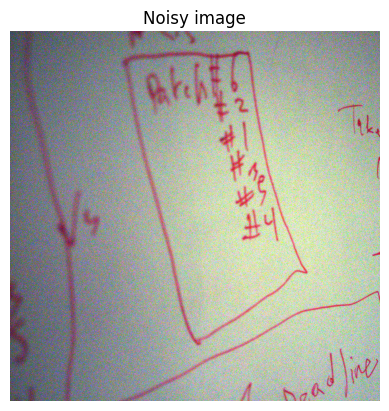

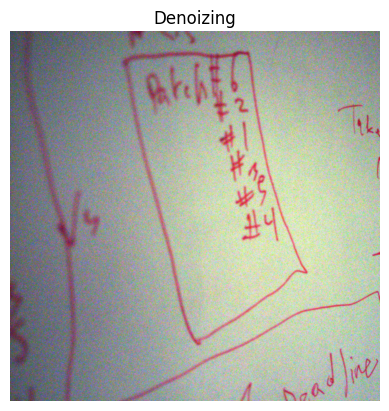

PSNR between reference image and noisy image: 39.48947749113291
PSNR between reference image and denoised image: 39.17056324153429


In [162]:
shape = noisy.shape
print(shape)

#noisy_downsampled = noisy[::4, ::4, :]
noisy_downsampled = sk.transform.resize(noisy, (shape[0] // 4, shape[1] // 4))
print(noisy_downsampled.shape)

noisy_upsampled = sk.transform.resize(noisy_downsampled, shape)
print(noisy_upsampled.shape)
print_image(noisy, "Noisy image")
print_image(noisy_upsampled, "Denoizing")

print(f"PSNR between reference image and noisy image: {PSNR(reference, noisy)}")
print(f"PSNR between reference image and denoised image: {PSNR(reference, noisy_upsampled)}")

(c) Convert both images to grayscale and redo part (b). Explain why the PSNR is higher for the denoised grayscale image.
> **Hint**: The reason is linked to exercise 5. Explain why.

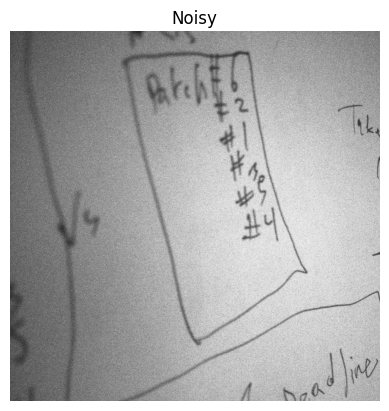

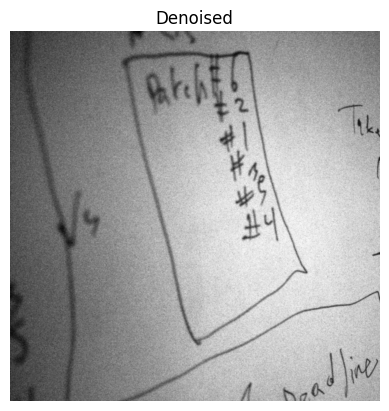

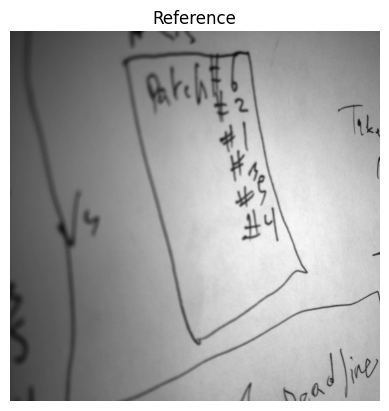

In [163]:
reference_grayscale = sk.color.rgb2gray(reference)
noisy_grayscale = sk.color.rgb2gray(noisy)
shape = noisy_grayscale.shape

noisy_denoised = sk.transform.resize(sk.transform.resize(noisy_grayscale, (shape[0] // 4, shape[1] // 4)), shape)

print_image(noisy_grayscale, "Noisy", 'gray')
print_image(noisy_denoised, "Denoised", 'gray')
print_image(reference_grayscale, "Reference", 'gray')

> --your answer --

(d) What other methods could you suggest to improve the noisy image quality?

> --your answer --

___